# Cost Benefit Analysis

## Libraries & Data Import

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

%matplotlib inline

In [2]:
# import cleaned datasets/ original Kaggle datasets 
spray = pd.read_csv("../assets/cleaned_spray.csv")
train = pd.read_csv("../assets/train.csv")

In [3]:
# see shape and head
print(spray.shape)
spray.head()

(14835, 8)


,date,time,latitude,longitude,time_24h,day,month,year
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,18:56:58,29,8,2011
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,18:57:08,29,8,2011
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,18:57:18,29,8,2011
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,18:57:28,29,8,2011
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,18:57:38,29,8,2011


In [4]:
# see shape and head
print(train.shape)
train.head()

(10506, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
# see Dtype and any missing data
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
 4   time_24h   14251 non-null  object 
 5   day        14835 non-null  int64  
 6   month      14835 non-null  int64  
 7   year       14835 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 927.3+ KB


In [6]:
# see Dtype and any missing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


We will correct the Dtype for `Date`.

In [7]:
train['Date'] = pd.to_datetime(train['Date'])
spray['date'] = pd.to_datetime(spray['date'])

In [8]:
#2011 and 2013 spray dates
# there is only this 2 year of data recorded within the excel
spray_2011 = spray.loc[spray['year']==2011,'date'].unique()
spray_2013 = spray.loc[spray['year']==2013,'date'].unique()

In [9]:
#2011 and 2013 wnv from train set
# we will take the count of wnv instead of treating it as a categorical value
wnv_2011 = train[train['Date'].dt.year==2011].groupby('Date')['WnvPresent'].sum()
wnv_2013 = train[train['Date'].dt.year==2013].groupby('Date')['WnvPresent'].sum()

In [10]:
#2011 and 2013 num mosquitos from train set
mosquitos_2011 = train[train['Date'].dt.year==2011].groupby('Date')['NumMosquitos'].sum()
mosquitos_2013 = train[train['Date'].dt.year==2013].groupby('Date')['NumMosquitos'].sum()

## Graph of the mosquito count vs Spray and West Nile Virus Mosquito vs Spray

### 2011

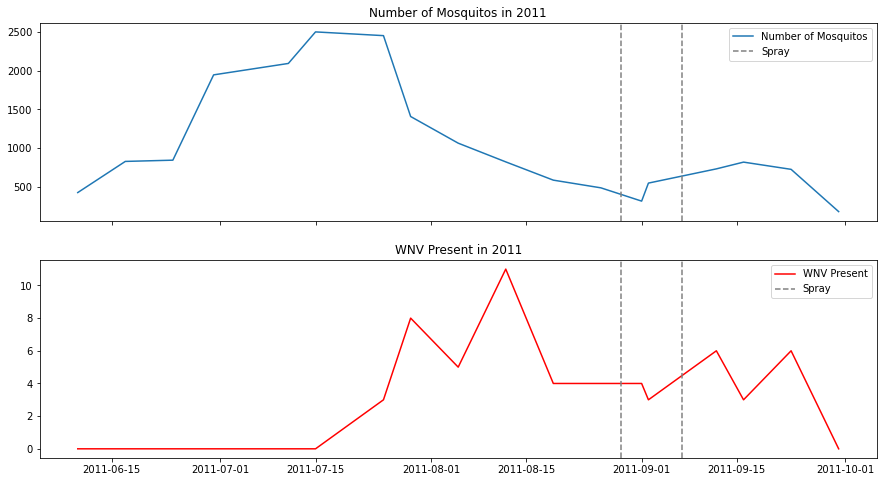

In [11]:
fig, ax = plt.subplots(nrows=2,sharex=True, figsize=(15,8))

#plot num mosquitos in 2011 against spray dates
ax[0].plot(mosquitos_2011.index, mosquitos_2011.values)
for spray_date in spray_2011:
    ax[0].axvline(x=spray_date, color='grey', ls='--')
ax[0].set_title('Number of Mosquitos in 2011')
ax[0].legend(['Number of Mosquitos','Spray']);

#plot wnv in 2011 against spray dates
ax[1].plot(wnv_2011.index,wnv_2011.values, color='red')
for spray_date in spray_2011:
    ax[1].axvline(x=spray_date, color='grey', ls='--')
ax[1].set_title('WNV Present in 2011')
ax[1].legend(['WNV Present','Spray']);

We see that there was a drop in the number of mosquitos during the first spray but not for the second spray. 

### 2013

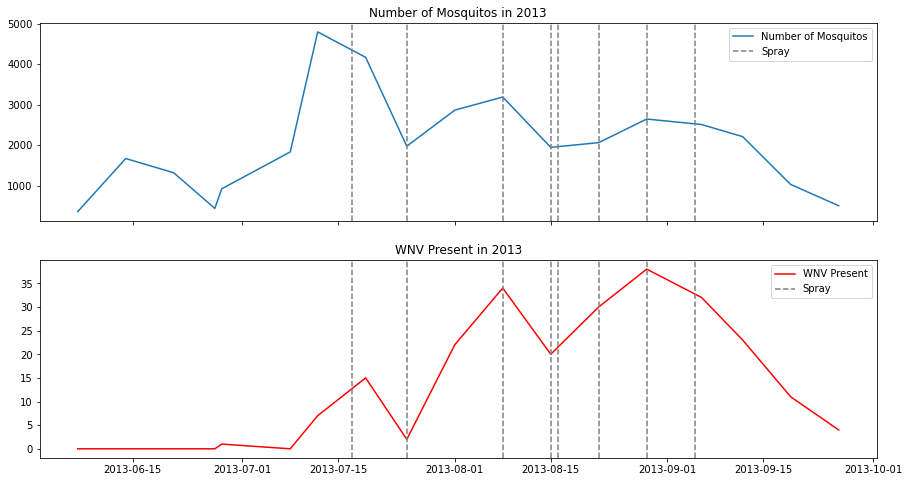

In [12]:
fig, ax = plt.subplots(nrows=2,sharex=True, figsize=(15,8))

#plot num mosquitos in 2013 against spray dates
ax[0].plot(mosquitos_2013.index, mosquitos_2013.values)
for spray_date in spray_2013:
    ax[0].axvline(x=spray_date, color='grey', ls='--')
ax[0].set_title('Number of Mosquitos in 2013')
ax[0].legend(['Number of Mosquitos','Spray']);

#plot wnv in 2011 against spray dates
ax[1].plot(wnv_2013.index,wnv_2013.values, color='red')
for spray_date in spray_2013:
    ax[1].axvline(x=spray_date, color='grey', ls='--')
ax[1].set_title('WNV Present in 2013')
ax[1].legend(['WNV Present','Spray']);

Only during the spray in the week of 15 July, spraying seemed to have a decrease in the number of mosquitoes and a decrease in the virus. During the rest of the spray, there is either a slight drop or an increase after the spray. 

Assumption:
- These graphs reflected the total mosquitos vs spray. 
- These graphs reflected the number for the whole of chigaco and not at the area where the spray took place. 

While it is debatable to conclude that spraying helps with controlling the number of mosquitos and the work, it is highly possible if the number of mosquito will drop if the spray is being deployed at the correct location. 

## Predictions


In [13]:
# read in the prediction saved from 04_Kaggle_Predictions
prediction = pd.read_csv("../assets/submission_predictions.csv")
test = pd.read_csv("../assets/test.csv")

In [14]:
# see shape and head
print(prediction.shape)
prediction.head()

(116293, 2)


,Id,WnvPresent
0,1,0.319231
1,2,0.306525
2,3,0.319231
3,4,0.291683
4,5,0.291683


In [15]:
# see shape and head
print(test.shape)
test.head()

(116293, 11)


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [16]:
# see Dtype and missing data
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          116293 non-null  int64  
 1   WnvPresent  116293 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [17]:
# see Dtype and missing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [18]:
# convert the values to 1 or 0 for prediction, with 1 being yes
prediction['WnvPresent'] = [0 if prob < 0.5 else 1 for prob in prediction['WnvPresent']]

In [19]:
# convert the datetime Dtype for test
test['Date'] = pd.to_datetime(test['Date'])

In [20]:
# merge both dataframe into one
prediction = pd.merge(prediction, test, on="Id")

In [21]:
# see shape and head
print(prediction.shape)
prediction.head()

(116293, 12)


,Id,WnvPresent,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,0,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [22]:
# see Dtype and missing data
prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   WnvPresent              116293 non-null  int64         
 2   Date                    116293 non-null  datetime64[ns]
 3   Address                 116293 non-null  object        
 4   Species                 116293 non-null  object        
 5   Block                   116293 non-null  int64         
 6   Street                  116293 non-null  object        
 7   Trap                    116293 non-null  object        
 8   AddressNumberAndStreet  116293 non-null  object        
 9   Latitude                116293 non-null  float64       
 10  Longitude               116293 non-null  float64       
 11  AddressAccuracy         116293 non-null  int64         
dtypes: datetime64[ns](1), float64(

In [23]:
# create a column of year
prediction['year'] = prediction['Date'].dt.year

In [24]:
# by total
prediction.groupby(by=['WnvPresent'])['Id'].count()

WnvPresent
0    107091
1      9202
Name: Id, dtype: int64

In [25]:
# by year
prediction.groupby(by=['year','WnvPresent'])['Id'].count()

year  WnvPresent
2008  0             29268
      1              1230
2010  0             34641
      1              1916
2012  0             22688
      1              4427
2014  0             20494
      1              1629
Name: Id, dtype: int64

We can see that we are predicting a total of 9139 cases in year 2008, 2010, 2012 and 2014. 

## Spray Cost

The Chicago Department of Public Health (CDPH) is continuing its efforts to combat against the West Nile virus. [[link1](https://www.chicago.gov/city/en/depts/cdph/provdrs/health_protection_and_response/news/2021/july/cdph-conducts-a-comprehensive-mosquito-surveillance-and-control-.html), [link2](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_living/news/2021/august/city-to-spray-insecticide-wednesday-to-kill-mosquitoes.html)]

The insecticide used by the CDPH ([link](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_living/news/2021/august/city-to-spray-insecticide-wednesday-to-kill-mosquitoes.html)) is the [Zenivex E4](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf). Zenivex™, is approved for use by the U.S. Environmental Protection Agency and has been widely applied to control mosquitoes in outdoor residential and recreational areas. Only 1.5 fluid ounces (three
tablespoons) per acre is applied. 

Assuming that the price at delaware is similar to chicago ([link](https://bidcondocs.delaware.gov/NAT/NAT_19123-INSECTICIDE_An.pdf)):
![zenivex.jpg](../assets/zenivex-price.png)

The entire city of Chicago has an area size of 606.60 km2. Chicago has very few water bodies, and the land area size totals to 588.98 km2 (145545 acres).

In [26]:
# cost per acre
cost_per_acre = 87/128*1.5
print(cost_per_acre)

1.01953125


In [27]:
# assuming area spray for each exercise is the same
# assuming 0.5miles squares * 7 squares being sprayed each month 
# Area ref - https://www.chicago.gov/content/dam/city/depts/cdph/CDPH/Healthy%20Chicago/SprayZone_T220_08252021.pdf

spray_cost_per_location = cost_per_acre * (0.5*0.5*7*640)
print(f'Cost to spray one location per month ${spray_cost_per_location:.2f}')
print(f'Cost to spray one location per year ${spray_cost_per_location*12:.2f}')

Cost to spray one location per month $1141.88
Cost to spray one location per year $13702.50


## Hospitalisation cost

Looking at the [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/), we see that the cost to treat an infected patient diagnosed with West Nile neuroinvasive disease (WWND) amounts to approx \$33k per case, excluding the economic cost. 

For more mild cases where the patient only suffers from West Nile Fever (WNF), the article mentioned the treatment cost is approx \$167 and \$135 for diagnostic test. 

In [28]:
# define the mean value from the range
med_cost_per_case = 167+135
print(f'Medical cost per case for WNF estimated to be ${med_cost_per_case:.0f}')

Medical cost per case for WNF estimated to be $302


In [29]:
# create dataframe of the number of cases
cases_pred = prediction.groupby(by=['year','WnvPresent'])['Id'].count()
cases_pred = cases_pred.reset_index()
cases_pred

,year,WnvPresent,Id
0,2008,0,29268
1,2008,1,1230
2,2010,0,34641
3,2010,1,1916
4,2012,0,22688
5,2012,1,4427
6,2014,0,20494
7,2014,1,1629


In [30]:
# Calculate the medical cost for each year
pred_med_cost_year = []
for index, row in cases_pred.loc[(cases_pred['WnvPresent'] == 1),['Id']].iterrows():
    pred_med_cost_year.append(row[0]*med_cost_per_case)
    
print(pred_med_cost_year)

[371460, 578632, 1336954, 491958]


In [31]:
# create list for year
year = [2008, 2010, 2012, 2014]

# print out cost based on year
for i in range(len(year)):
    print(f'In year {year[i]}, the medical cost is ${pred_med_cost_year[i]:.2f}')

In year 2008, the medical cost is $371460.00
In year 2010, the medical cost is $578632.00
In year 2012, the medical cost is $1336954.00
In year 2014, the medical cost is $491958.00


## Summary

By using our prediction of our model against the cost that will be incurred if the government were to conduct spraying at 1120 acre a month, we see that the medical cost are much higher compared to using a spray. In fact, the govement can consider to conduct spraying up to 33 different locations to cover 25% of Chicago a month and the medical cost will still be higher (other than for year 2008). 

In [35]:
# define number of location
num_loc = 1
print(f'For {num_loc} location')

# define total spray cost
total_spray_cost = spray_cost_per_location*12*num_loc

# comparing cost
for i in range(len(year)):
    if pred_med_cost_year[i] > total_spray_cost:
        print(f'In year {year[i]}, the medical cost is higher by ${pred_med_cost_year[i] - total_spray_cost:.2f}')
    else:
        print(f'In year {year[i]}, the spray cost is higher by ${total_spray_cost - pred_med_cost_year[i]:.2f}')

For 1 location
In year 2008, the medical cost is higher by $357757.50
In year 2010, the medical cost is higher by $564929.50
In year 2012, the medical cost is higher by $1323251.50
In year 2014, the medical cost is higher by $478255.50


In [45]:
num_loc_target = math.ceil(0.25 / ((0.5*0.5*7*640)/145545))
print(f'To cover 25%, need to spray {num_loc_target} locations')

To cover 25%, need to spray 33 locations


In [46]:
# define number of location
num_loc = num_loc_target
print(f'For {num_loc} location')

# define total spray cost
total_spray_cost = spray_cost_per_location*12*num_loc

# comparing cost
for i in range(len(year)):
    if pred_med_cost_year[i] > total_spray_cost:
        print(f'In year {year[i]}, the medical cost is higher by ${pred_med_cost_year[i] - total_spray_cost:.2f}')
    else:
        print(f'In year {year[i]}, the spray cost is higher by ${total_spray_cost - pred_med_cost_year[i]:.2f}')

For 33 location
In year 2008, the spray cost is higher by $80722.50
In year 2010, the medical cost is higher by $126449.50
In year 2012, the medical cost is higher by $884771.50
In year 2014, the medical cost is higher by $39775.50


This calculation did not factor in the potential economic cost impact the virus has to the economy. Should there be an outbreak, the cost difference will be even larger, and could possibly make up the difference for year 2008.  

This suggests that we should choose one of the vector control methods, such as spraying of insecticide to save future costs impacted by the existence of the West Nile Virus.

However, mosquito populations can bring about other vector borne diseases such as dengue and malaria. The department should continue the efforts to educate the population on preventive measures that can be taken to prevent the breeding of mosquitos, starting from their own homes. 